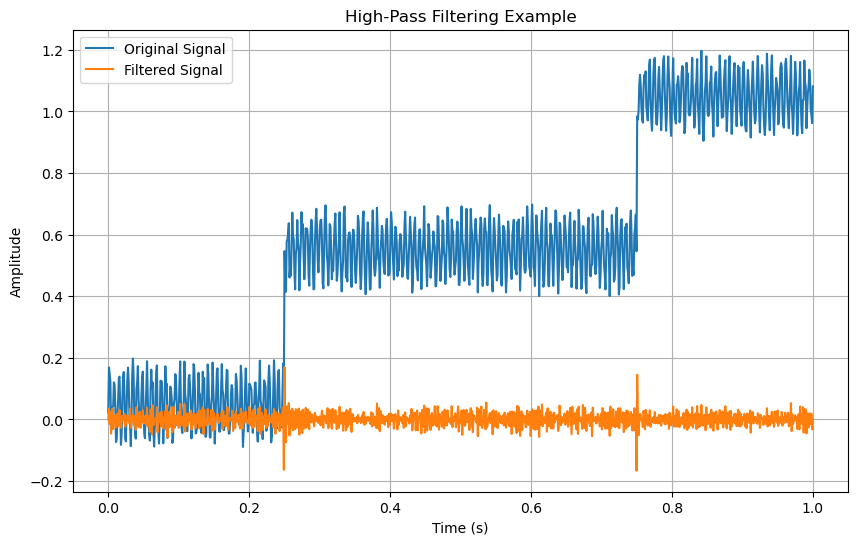

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter parameters
cutoff_freq = 200  # Cutoff frequency in Hz
fs = 1000  # Sampling rate in Hz
order = 4  # Filter order

# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype='highpass')  # <-- modify here

# Sample data (with time vector)
t = np.linspace(0, 1, 1000)  # Time vector for 1 second signal
data = 0.5 * np.heaviside(t - 0.25, 0) + 0.5 * np.heaviside(t - 0.75, 0) + 0.1 * np.sin(2*np.pi*150*t) + 0.1 * np.random.rand(1000)  # Example signal with noise

# Apply the filter
filtered_data = filtfilt(b, a, data)

# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, data, label='Original Signal')
plt.plot(t, filtered_data, label='Filtered Signal')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High-Pass Filtering Example')
plt.legend()
plt.grid(True)

plt.show()

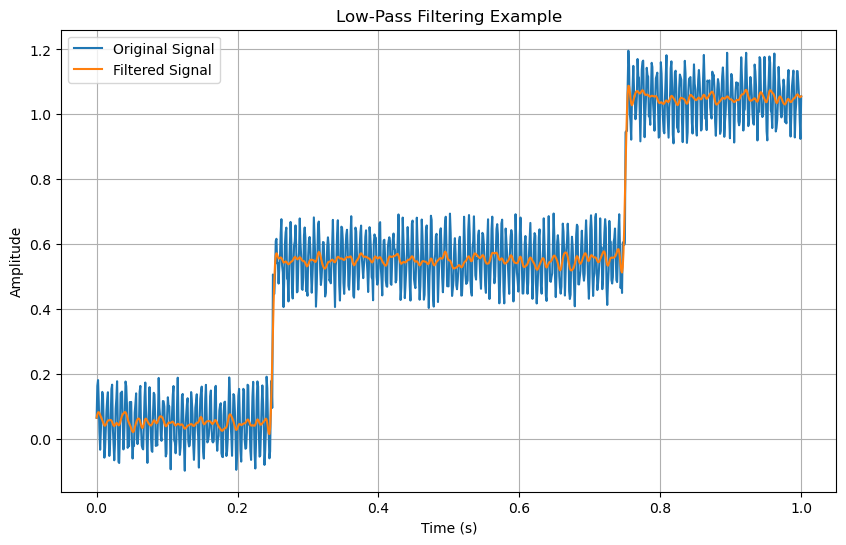

In [36]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter parameters
cutoff_freq = 100  # Cutoff frequency in Hz
fs = 1000  # Sampling rate in Hz
order = 4  # Filter order

# Design the low-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype="lowpass")

# Sample data (with time vector)
t = np.linspace(0, 1, 1000)  # Time vector for 1 second signal
data = 0.5 * np.heaviside(t - 0.25, 0) + 0.5 * np.heaviside(t - 0.75, 0) + 0.1 * np.sin(2*np.pi*150*t) + 0.1 * np.random.rand(1000)  # Example signal with noise

# Apply the filter
filtered_data = filtfilt(b, a, data)

# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, data, label="Original Signal")
plt.plot(t, filtered_data, label="Filtered Signal")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Low-Pass Filtering Example")
plt.legend()
plt.grid(True)

plt.show()

<StemContainer object of 3 artists>

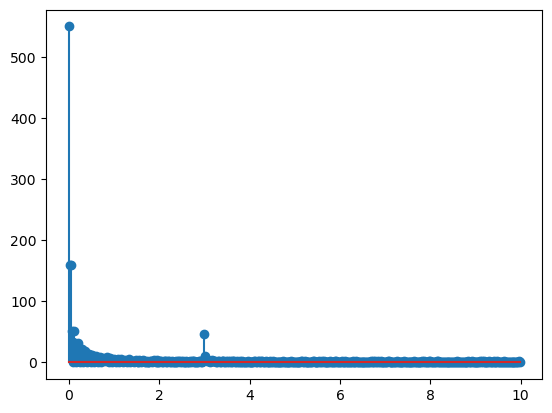

In [57]:
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq, ifft
from typing import Literal

def filter(signal: np.array, cutoff_freq: int, fs: int, order: int, btype:Literal['highpass', 'losspass']):
    nyq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyq
    b, a = butter(order, normal_cutoff, btype=btype)
    filtered = filtfilt(b, a, signal)
    return filtered

def DFT(x:np.array):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

def transform(signal: np.array, sr: int):
    dft = DFT(signal)
    N = len(dft)
    n = np.arange(N)
    T = N / sr
    freq = n / T

    n_oneside = N // 2
    freq_oneside = freq[:n_oneside]
    dft_oneside = dft[:n_oneside]
    
    return freq_oneside, dft_oneside

freq, amp = transform(data, 20)
plt.stem(freq, abs(amp))

/home/jk9075/miniconda3/envs/research-env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jk9075/miniconda3/envs/research-env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


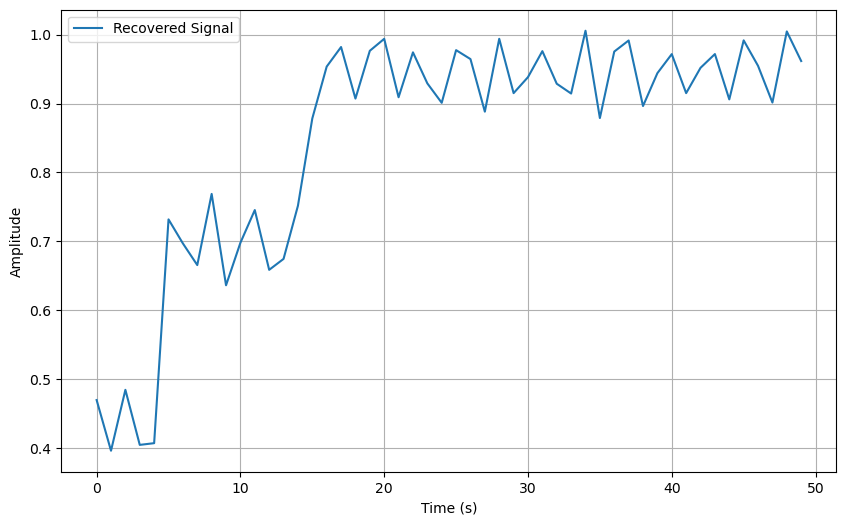

In [65]:
signal_recovery = ifft(amp, 10000)

# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, signal_recovery, label="Recovered Signal")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.show()

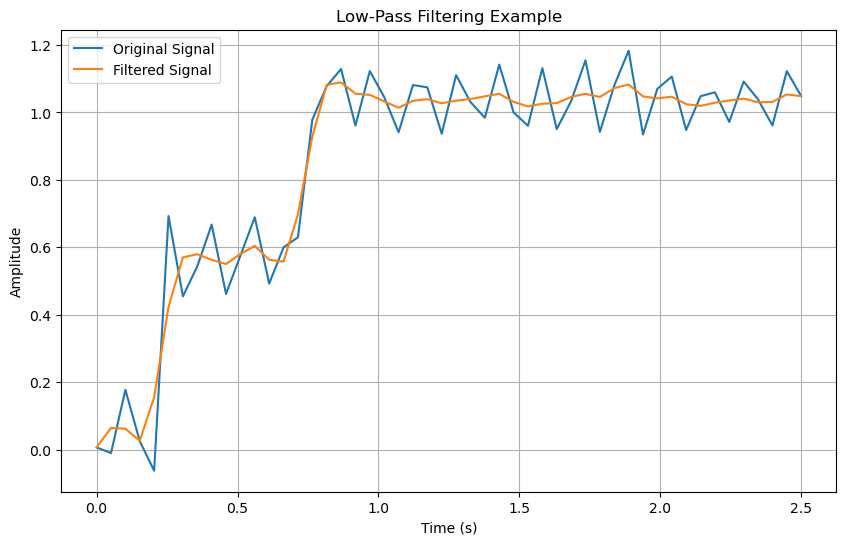

<StemContainer object of 3 artists>

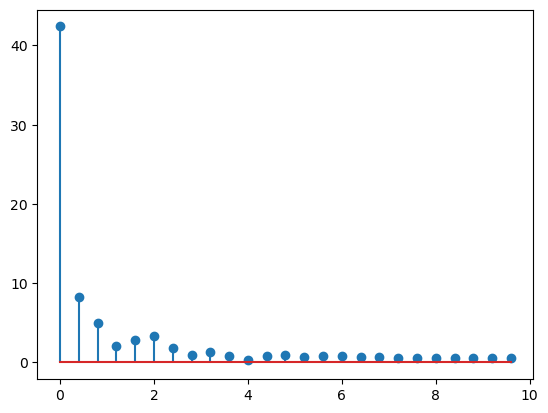

In [67]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter parameters
cutoff_freq = 5  # Cutoff frequency in Hz
fs = 20  # Sampling rate in Hz
order = 2  # Filter order

# Design the low-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_freq / nyq
b, a = butter(order, normal_cutoff, btype="lowpass")

# Sample data (with time vector)
T = 2.5
t = np.linspace(0, T, int(fs * T))  # Time vector for 1 second signal
data = (
    0.5 * np.heaviside(t - 0.25, 0)
    + 0.5 * np.heaviside(t - 0.75, 0)
    + 0.1 * np.sin(2 * np.pi * 150 * t)
    + 0.1 * np.random.rand(int(fs * T))
)  # Example signal with noise

# Apply the filter
filtered_data = filtfilt(b, a, data)

# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, data, label="Original Signal")
plt.plot(t, filtered_data, label="Filtered Signal")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Low-Pass Filtering Example")
plt.legend()
plt.grid(True)

plt.show()

freq, amp = transform(filtered_data, fs)
plt.stem(freq, abs(amp))

/home/jk9075/miniconda3/envs/research-env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jk9075/miniconda3/envs/research-env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


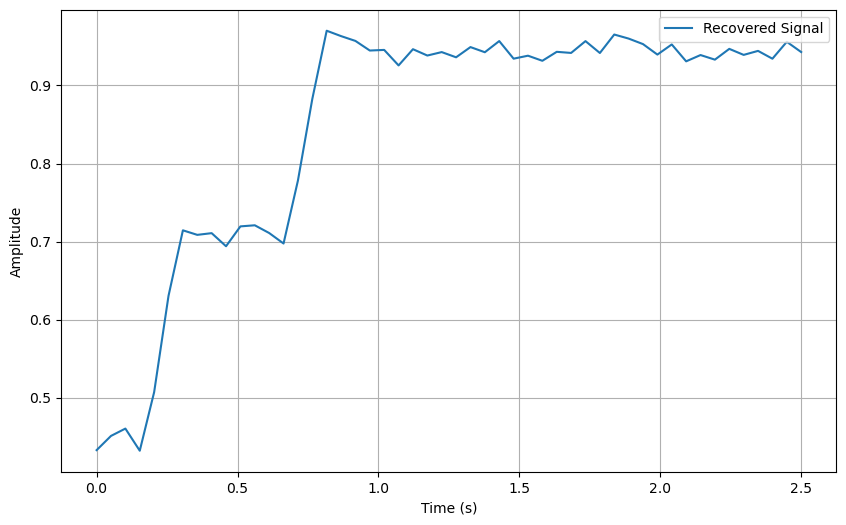

In [68]:
signal_recovery = ifft(amp, int(fs * T))

# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, signal_recovery, label="Recovered Signal")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.show()